<a href="https://colab.research.google.com/github/desaraju02/ai_ml_dl/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
# prompt: encode Position column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Position'] = le.fit_transform(dataset['Position'])
dataset


,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000
5,7,6,150000
6,6,7,200000
7,9,8,300000
8,1,9,500000
9,2,10,1000000


In [7]:

X = dataset.drop('Salary', axis=1)
y = dataset['Salary']

In [8]:
X

,Position,Level
0,0,1
1,4,2
2,8,3
3,5,4
4,3,5
5,7,6
6,6,7
7,9,8
8,1,9
9,2,10


In [9]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


### Training the Decision tree regression model on the whole data set

In [10]:
# prompt: import Decision Tree Regression model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)
y_pred = regressor.predict(X)
y_pred




array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

In [11]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y.values.reshape(len(y),1)),1))
# ### Predicting a new result
# **Visualizing the Decision tree regression results**
# Since the dataset has only one feature, we can visualize the Decision Tree Regression model.
# **Visualizing the Decision tree regression results(higher resolution)**
# We increase the resolution so that the steps are clearer.


[[  45000.   45000.]
 [  50000.   50000.]
 [  60000.   60000.]
 [  80000.   80000.]
 [ 110000.  110000.]
 [ 150000.  150000.]
 [ 200000.  200000.]
 [ 300000.  300000.]
 [ 500000.  500000.]
 [1000000. 1000000.]]


In [13]:
X.shape

(10, 2)

### Predict new value

In [21]:
regressor.predict([[7,6.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([150000.])

### Visualising the Decision Tree Regression Results (higher version)

KeyError: 1

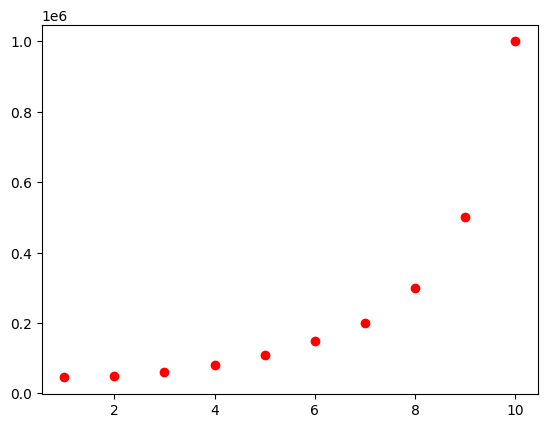

In [24]:
plt.scatter(X.iloc[:,1],y, color='r')
plt.plot(X[1],regressor.predict(X), color='b')
plt.title('Truth or Bluff (Linear Reg)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()